# **Introduction to Natural Language Processing (NLP)** - NER & Sentiment Analysis

**Duke Machine Learning Summer School 2022**

In this session, we will focus on applied NLP using higher-level utility functions that abstract-away some of the nuances of both data preparation and model specification using the [spaCy](https://spacy.io/) Python package. Spacy delivers both [speed and near state-of-the-art performance](https://spacy.io/usage/facts-figures#benchmarks) on many common NLP tasks. SpaCy's model architectures are written in [Thinc](https://thinc.ai/), another module that allows easy integration between Tensorflow, PyTorch, and MLMix. While defining neural nets is not the focus of today's discussion, an example can be found [here](https://www.kaggle.com/atulanandjha/bert-testing-on-imdb-dataset-extensive-tutorial). I hope the examples and recipes we will discuss peak your interest and encourage you to dig deeper.

As you have likedly ascertained, NLP applications are complex. Common considerations and applications include:
- **Sentence boundary detection**
- **Tokenization**, splitting text into individual words of punctuation
- **Lemmmatization**, converts words to their root form (i.e., went -> go)
- **Vectorization**, assigning numerical representations to represent similarities between like words
- **Named Entity Recognition (NER)**, detection of things like people, places, and products
- **Token/Entity Disambiguation**, how NL-systems differentiate 'go' as verb, board game, or programming language
- **Sentiment Analysis**
- **Similarity Metrics**

For additional information, see the [spaCy tutorials](https://course.spacy.io/en). Let's get started.

# **1. Motivating Example with NER**

In [1]:
!python -m pip install spacy==3.2
!python -m spacy download en_core_web_sm 
!python -m spacy download en_core_web_md 

     |████████████████████████████████| 6.0 MB 32.7 MB/s            
     |████████████████████████████████| 181 kB 89.9 MB/s            
     |████████████████████████████████| 457 kB 75.5 MB/s            
     |████████████████████████████████| 42 kB 1.4 MB/s             
     |████████████████████████████████| 11.3 MB 75.6 MB/s            
     |████████████████████████████████| 668 kB 48.5 MB/s            
     |████████████████████████████████| 128 kB 53.2 MB/s            
     |████████████████████████████████| 9.9 MB 51.1 MB/s            
     |████████████████████████████████| 58 kB 5.5 MB/s             
     |████████████████████████████████| 96 kB 4.3 MB/s             
     |████████████████████████████████| 13.9 MB 21.2 MB/s            
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     |████████████████████████████████| 45.7 MB 25.9 MB/s            
✔ Download and installation successful
You can now load the package via

In [2]:
!unzip ./duke_sum_nlp.zip

Archive:  ./duke_sum_nlp.zip
  inflating: base_config.cfg         
  inflating: config.cfg              
  inflating: train.spacy             
   creating: trained_textcat_model/
   creating: trained_textcat_model/model-best/
  inflating: trained_textcat_model/model-best/config.cfg  
  inflating: trained_textcat_model/model-best/meta.json  
   creating: trained_textcat_model/model-best/textcat/
  inflating: trained_textcat_model/model-best/textcat/cfg  
  inflating: trained_textcat_model/model-best/textcat/model  
  inflating: trained_textcat_model/model-best/tokenizer  
   creating: trained_textcat_model/model-best/vocab/
 extracting: trained_textcat_model/model-best/vocab/key2row  
 extracting: trained_textcat_model/model-best/vocab/lookups.bin  
  inflating: trained_textcat_model/model-best/vocab/strings.json  
  inflating: trained_textcat_model/model-best/vocab/vectors  
 extracting: trained_textcat_model/model-best/vocab/vectors.cfg  
   creating: trained_textcat_model/model-last/

In [3]:
import pandas as pd
import spacy
from spacy import displacy

In [4]:
nlp = spacy.load("en_core_web_sm")

# Process whole documents
text = ("Amazon and Google have each annonced 20:1 stock splits to occur in June 2022.")
doc = nlp(text)

displacy.render(doc, style="ent", jupyter=True)

It is not immediately apparent looking at the code, but under the hood, this code is running 5 to 6 different models to segment sentences and words; identify linguistic dependencies; vectorize text for semantic meaning; identify entities; and more. We can have a look at whats under the hood for a given pipeline with the following:

In [5]:
for p in nlp.pipeline:
  print(p)

('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x7f39c340fee0>)
('tagger', <spacy.pipeline.tagger.Tagger object at 0x7f39c340ff40>)
('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x7f39c33850b0>)
('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x7f39c3391700>)
('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x7f39c33ad3c0>)
('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x7f39c3385200>)


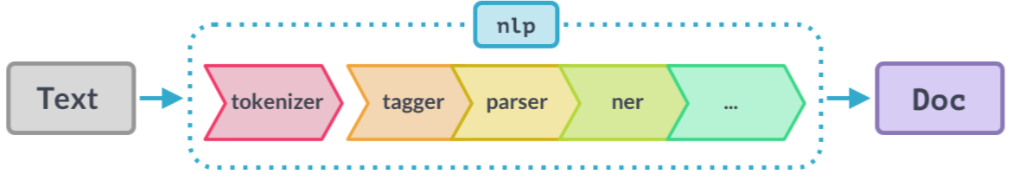

## 1.1 Tokenized Text

In [6]:
print([t for t in doc])

[Amazon, and, Google, have, each, annonced, 20:1, stock, splits, to, occur, in, June, 2022, .]


In [8]:
for t in doc:
  print(t.idx, ', ', t.text, ', ', t.pos_, ', ', t.tag_, ', ', t.dep_, ', ', t.ent_type_)

0 ,  Amazon ,  PROPN ,  NNP ,  nsubj ,  ORG
7 ,  and ,  CCONJ ,  CC ,  cc ,  
11 ,  Google ,  PROPN ,  NNP ,  conj ,  ORG
18 ,  have ,  AUX ,  VBP ,  aux ,  
23 ,  each ,  PRON ,  DT ,  dep ,  
28 ,  annonced ,  VERB ,  VBN ,  ROOT ,  
37 ,  20:1 ,  NUM ,  CD ,  nummod ,  CARDINAL
42 ,  stock ,  NOUN ,  NN ,  compound ,  
48 ,  splits ,  NOUN ,  NNS ,  dobj ,  
55 ,  to ,  PART ,  TO ,  aux ,  
58 ,  occur ,  VERB ,  VB ,  relcl ,  
64 ,  in ,  ADP ,  IN ,  prep ,  
67 ,  June ,  PROPN ,  NNP ,  pobj ,  DATE
72 ,  2022 ,  NUM ,  CD ,  nummod ,  DATE
76 ,  . ,  PUNCT ,  . ,  punct ,  


In [9]:
displacy.render(doc, style="dep", jupyter=True)

## 1.2 Entity Linking

In [10]:
nlp = spacy.load("en_core_web_sm")

# Process whole documents
text = ("Amazon and Google have each annonced 20:1 stock splits to occur in June 2022.")
doc = nlp(text)

displacy.render(doc, style="ent", jupyter=True)

In [11]:
print([e for e in doc.ents])

[Amazon, Google, 20:1, June 2022]


In [12]:
for e in doc.ents:
    print(e.text, e.label_, spacy.explain(e.label_))

Amazon ORG Companies, agencies, institutions, etc.
Google ORG Companies, agencies, institutions, etc.
20:1 CARDINAL Numerals that do not fall under another type
June 2022 DATE Absolute or relative dates or periods


## 1.3. Refining an NER System
Let's expand our existing example and look at a collection of texts. In this example, we will see that our NER model is good, but not perfect. Can you identify the issues?

In [14]:
nlp = spacy.load("en_core_web_sm")

HEADLINES = (
    "Amazon and Google have each annonced 20:1 stock splits to occur in June 2022.",
    "Ford is pushing back deliveries to late May due to continuing chip shortage.",
    "Deutsche Bank reverses course on Russia, says it is unwinding business there after Ukraine invasion",
    "Costco memberships may cost more this summer",
    "Apple's new MacBook Air and 13-inch MacBook Pro with M2 processor coming later this summer.",
    "Tesla and Ford are delaying production due to supply-chain shortages."
)

for doc in nlp.pipe(HEADLINES):
  displacy.render(doc, style="ent", jupyter=True)

Now that we have observed the potential issues with our existing NER model, let's see if we can refine our code by introducing a few new training samples. We will use the following code recipe to update our NER model components. While we will not cover every facet of the code below, the big thing to notice is the format of the new training data. SpaCy requires a LIST of 2-element TUPLES, where the first element is the text and the second element is a dictionary. The dictionary is a key-value pair, where the KEY is 'entities' and the value is a list of tuples with the following format:
- item 1: start position of a new entity
- item 2: end position of a new entity
- item 3: user-defined types of the new entity

If the entity has not already been specified in the model configuration given by ``` XXX ```, then the entity can be added with the following:
```
ner = nlp.get_pipe("ner")
ner.add_label("<new-entity-name>")
```

In [15]:
import random
from spacy.util import minibatch, compounding
from spacy.training import Example

nlp = spacy.load("en_core_web_sm")

TRAINING_SAMPLES =[ ("Two US senators have raised concerns about Tesla's driving systems", {"entities": [(43, 48, "ORG")]}),
                    ("Elon Musk in the CEO of Tesla and SpaceX", {"entities": [(24, 29, "ORG"), (34, 40, "ORG")]}),
                    ("Rumors are circulating about the potential MacBook Pro 2022", {"entities": [(43,54, "PRODUCT")]}),
                  ]

ignore_pipes = [pipe for pipe in nlp.pipe_names if pipe!="ner"]
with nlp.disable_pipes(*ignore_pipes):
  for itr in range(5):
    random.shuffle(TRAINING_SAMPLES)
    batches = minibatch(TRAINING_SAMPLES, size=compounding(4.0, 32.0, 1.001))
    for batch in batches:
      texts, annotations = zip(*batch)

      example = []
      for i in range(len(texts)):
        doc = nlp.make_doc(texts[i])
        example.append(Example.from_dict(doc, annotations[i]))
      
      nlp.update(example, drop=0.2)

In [16]:
for doc in nlp.pipe(HEADLINES):
  displacy.render(doc, style="ent", jupyter=True)

The prior example involves training our model on specific cases of interest, but let's have a look at one of spaCy's models (```en_core_web_md```) which has been trained on a larger corpus of text

In [17]:
nlp = spacy.load("en_core_web_md")

for doc in nlp.pipe(HEADLINES):
  displacy.render(doc, style="ent", jupyter=True)

## 1.4 Automated Document Retrieval
One of the great advantages of domain-specific NER models is the ability to quickly identify relevant texts from a large corpus of text. Imagine reading 1000's of news headlines to identify all that relate to Ford as a company. Can we identify only these documents from our ```HEADLINES```?

In [18]:
ford_docs = []
for doc in nlp.pipe(HEADLINES):
  for e in doc.ents:
    if e.text=='Ford' and e.label_=='ORG':
      ford_docs.append(doc.text)
      continue

print(ford_docs)

['Ford is pushing back deliveries to late May due to continuing chip shortage.', 'Tesla and Ford are delaying production due to supply-chain shortages.']


# **2. Sentiment Analysis**
In this next example, we will be looking at text classification, specifically, sentiment analysis. In its simplest form, sentiment analysis generally refers to binary classification reflecting either positive or negative attitudes within a text. You might think of this as akin to the binary classification tasks from earlier MQM ML sessions on logistic regression with MLP. The difference here is that the input is text rather than numbers, at least initially. Other forms of sentiment analysis may include
- more granular sentiment (e.g., on a 5-point likert scale)
- intent analysis
- emotion detection

For this example, we will be using the [IMDB movie review dataset](https://ai.stanford.edu/~amaas/data/sentiment/) . This dataset consist of 50,000 movie reviews - 25K for training and 25K for test - which have been assigned either a positive or negative sentiment. For now, we will be using only 10K samples to train our model to limit runtime, but please note that as the model is exposed to more training samples, performance will often improve.

We will also be using spaCy's [pre-specified model architectures](https://spacy.io/api/textcategorizer), command line interface ([CLI](https://spacy.io/api/cli)), and dataset specification for text classification.

Let's first get started by downloading the IMBD datasets.

## 2.1 Downloading the IMDB Dataset

if you wanted to download the IMDB dataset and uncompress it youi could use these two commands:

          !wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
          !tar -xvf "aclImdb_v1.tar.gz"

but to save you the trouble, there is an uncompressed copy in the directory

          /datasets/aclImdb/
          

In [19]:
import os, random, spacy

def load_imdb(path):

  out = []
  for fn in os.listdir(path):
    with open(f'{path}/{fn}', errors='ignore') as f:
      text = f.read().replace("<br />", "\n\n").strip()
      out.append((text, path[-3:]))

  return out

train = load_imdb('/datasets/aclImdb/train/pos') + load_imdb('/datasets/aclImdb/train/neg')
test  = load_imdb('/datasets/aclImdb/test/pos') + load_imdb('/datasets/aclImdb/test/neg')

random.seed(123)
random.shuffle(train)
random.shuffle(test)

In [21]:
train[0]

('Despite much style, flash, and glitter, this French musical fails to speak. The tunes are repetitive, predictable, and tedious. The story is uninteresting, as are the many characters. \n\n\n\nPeople break into song and dance, without motivation or reason. Most of the cast wears phony looking wigs and hairpieces, and the sets look hopelessly studio bound.\n\n\n\nTo be honest, this video of the restored version was stopped before the end, so negative an effect it had on me. Certainly a shame, to have such a multi-talented cast in so feeble a final effort. \n\n\n\nGoes to show, I guess, where followups (in this case, to the great classic, "Umbrellas") often do go awry. One cannot recapture, only recreate.',
 'neg')

## 2.2 Specifying the spaCy Data Format
As we saw in our earlier NER example, spaCy requires a specific document structure to comply with its pre-built model architectures. For this example, we will be using the spaCy [DocBin](https://spacy.io/api/docbin) class to assign the text and a boolean (i.e., TRUE or FALSE) indicator for each of the labels that we wish to train. Note that labels may be either mutually-exclusive or not. In this example, we will be using the labels 'positive' and 'negative', which are mutually exclusive.

In [ ]:
from spacy.tokens import DocBin

nlp = spacy.load("en_core_web_md")

def create_spacy_data(data, out_path):
  docs = []
  for doc, label in nlp.pipe(data, as_tuples=True):
    doc.cats['positive'] = 'pos'==label
    doc.cats['negative'] = 'neg'==label
    docs.append(doc)

  doc_bin = DocBin(docs=docs)
  doc_bin.to_disk(out_path)

create_spacy_data(train[:5000],  './train.spacy')
create_spacy_data(train[-5000:], './valid.spacy')

## 2.3 Training a spaCy TextCat Model

After generating the spaCy-compliant binary document files, we will use the [spaCy config-file generator](https://spacy.io/usage/training) to specify the default text classification architecture. With only a couple of modifications, we will then be able to instruct spaCy to train our model via the CLI. After selecting the desired options, we will copy-paste the generated text called base_config.cfg. For the purposes of this course, this has been completed.


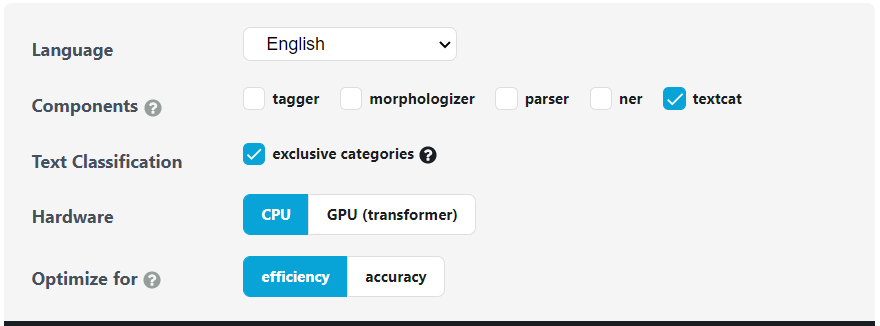


Once the base_config.cfg has been generated, open the file and change

```
[paths]
train = null
dev = null
```
to
```
[paths]
train = "./train.spacy"
dev = "./valid.spacy"
```

In [22]:
!python -m spacy init fill-config ./base_config.cfg ./config.cfg

✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [23]:
!python -m spacy train config.cfg --output ./trained_textcat_model_rerun

✔ Created output directory: trained_textcat_model_rerun
ℹ Saving to output directory: trained_textcat_model_rerun
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2022-06-09 19:36:45,268] [INFO] Set up nlp object from config
[2022-06-09 19:36:45,278] [INFO] Pipeline: ['textcat']
[2022-06-09 19:36:45,282] [INFO] Created vocabulary
[2022-06-09 19:36:45,283] [INFO] Finished initializing nlp object
[2022-06-09 19:37:10,968] [INFO] Initialized pipeline components: ['textcat']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['textcat']
ℹ Initial learn rate: 0.001
E    #       LOSS TEXTCAT  CATS_SCORE  SCORE 
---  ------  ------------  ----------  ------
  0       0          0.50       33.57    0.34
  0     200        121.90       65.52    0.66
  0     400         92.75       74.99    0.75
^C

Aborted!


Let's evaluate how it performed.

In [24]:
from sklearn.metrics import classification_report

nlp = spacy.load("./trained_textcat_model/model-best")

y_true = []
y_pred = []
for text, label in test[:1000]:
  y_true.append(label)
  if nlp(text).cats['positive']>0.5:
    y_pred.append('pos')
  else:
    y_pred.append('neg')

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         neg       0.88      0.84      0.86       505
         pos       0.85      0.88      0.86       495

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000

